In [1]:
import sklearn.datasets.california_housing as ch
import mpl_toolkits.basemap as bm
import numpy as np
import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset = ch.fetch_california_housing()

X = dataset.data
Y = dataset.target
print Y

print "Loaded data set with %d objects and %d variables" % (Y.shape[0], X.shape[1])
print "Coordinates ll=(%.3f, %3.f), ur=(%.3f, %.3f)" % (X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max())

[ 4.526  3.585  3.521 ...,  0.923  0.847  0.894]
Loaded data set with 20640 objects and 8 variables
Coordinates ll=(-124.350,  33), ur=(-114.310, 41.950)


(684, 8)
[[   1.4917       35.            3.84729064 ...,    3.908867     33.93
  -118.26      ]
 [   2.6458       41.            4.7107438  ...,    3.85123967   33.93
  -118.27      ]
 [   1.8191       36.            4.22766571 ...,    3.59365994   33.93
  -118.27      ]
 ..., 
 [  11.6677       37.            7.6056338  ...,    2.57746479   33.75
  -118.32      ]
 [  10.1357       24.            7.56451613 ...,    2.78908189   33.74
  -118.32      ]
 [   6.887        37.            5.91509434 ...,    2.44339623   33.77
  -118.32      ]]


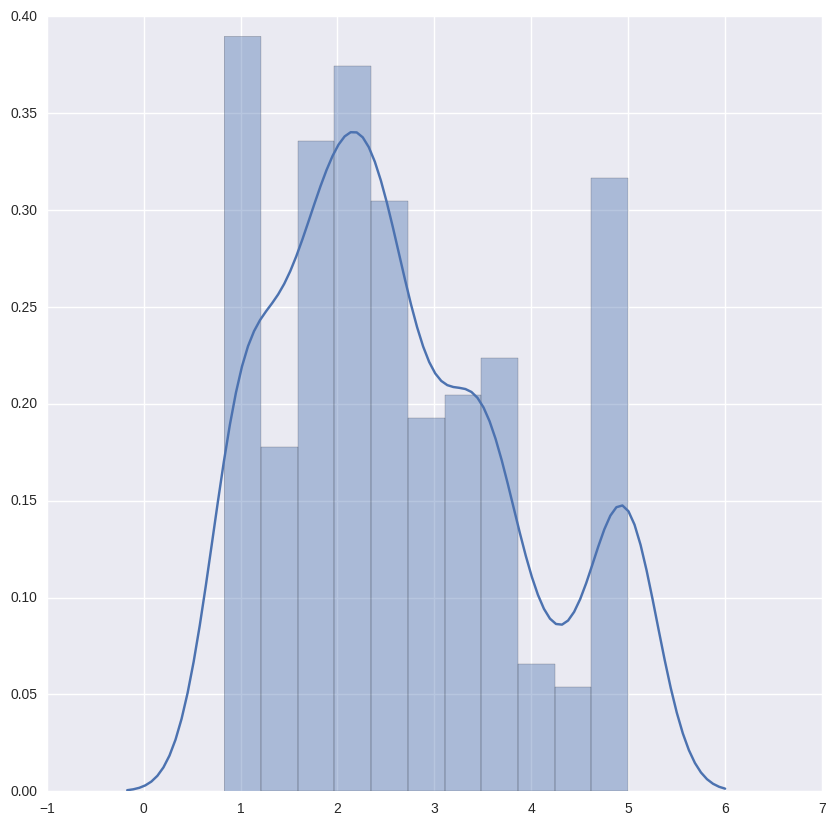

In [3]:
lllat, lllon = 33.704, -118.444
urlat, urlon = 33.931, -118.222

#lllat, lllon = 33, -125
#urlat, urlon = 42, -114

ind = np.logical_and(
    np.logical_and(X[:, -1] <= urlon, X[:, -1] >= lllon), 
    np.logical_and(X[:, -2] <= urlat, X[:, -2] >= lllat)
)

X_s = X[ind]
Y_s = Y[ind]

print X_s.shape
print X_s

pl.figure(figsize=(10, 10))
sns.distplot(Y_s)
pl.show()

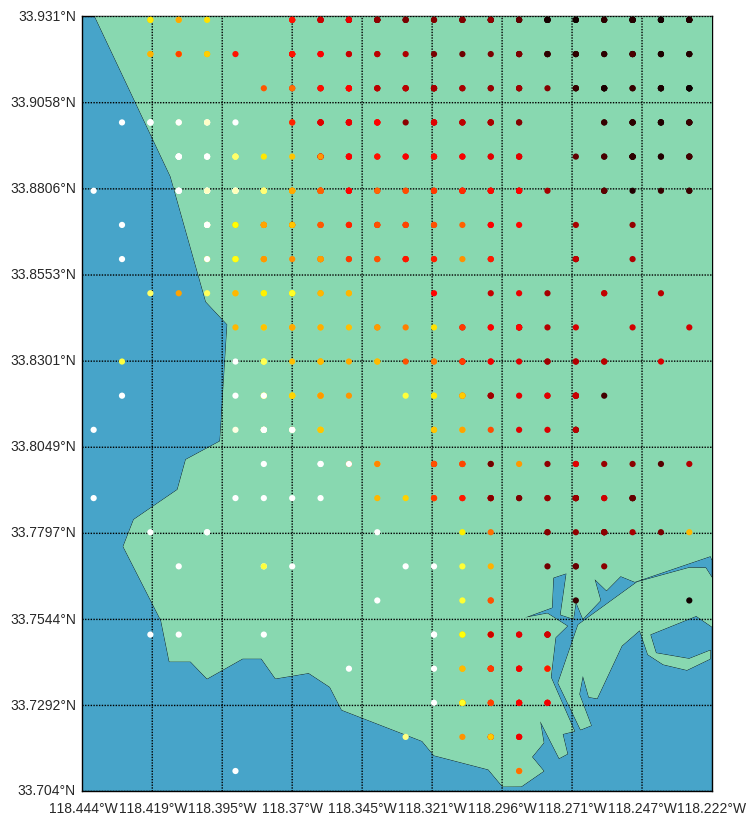

In [4]:
pl.figure(figsize=(10, 10))

m = bm.Basemap(
    llcrnrlon=lllon,
    llcrnrlat=lllat,
    urcrnrlon=urlon,
    urcrnrlat=urlat, 
    projection='merc',
    resolution='h'
)

m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='#47A4C9', zorder=1)
m.fillcontinents(color='#88D8B0',lake_color='#47A4C9', zorder=2)

parallels = np.linspace(lllat, urlat, 10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.linspace(lllon, urlon, 10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

colors = [pl.cm.hot(int((y - Y_s.min()) / (Y_s.max() - Y_s.min()) * 256)) for y in Y_s]
m.scatter(X_s[:, -1], X_s[:, -2], latlon=True, zorder=3, lw=0, c=colors)

# pl.annotate('San Francisco', xy=(0.04, 0.5), xycoords='axes fraction', color='white', size=15)
# pl.annotate('Los Angeles', xy=(0.4, 0.08), xycoords='axes fraction', color='white', size=15)

pl.show()

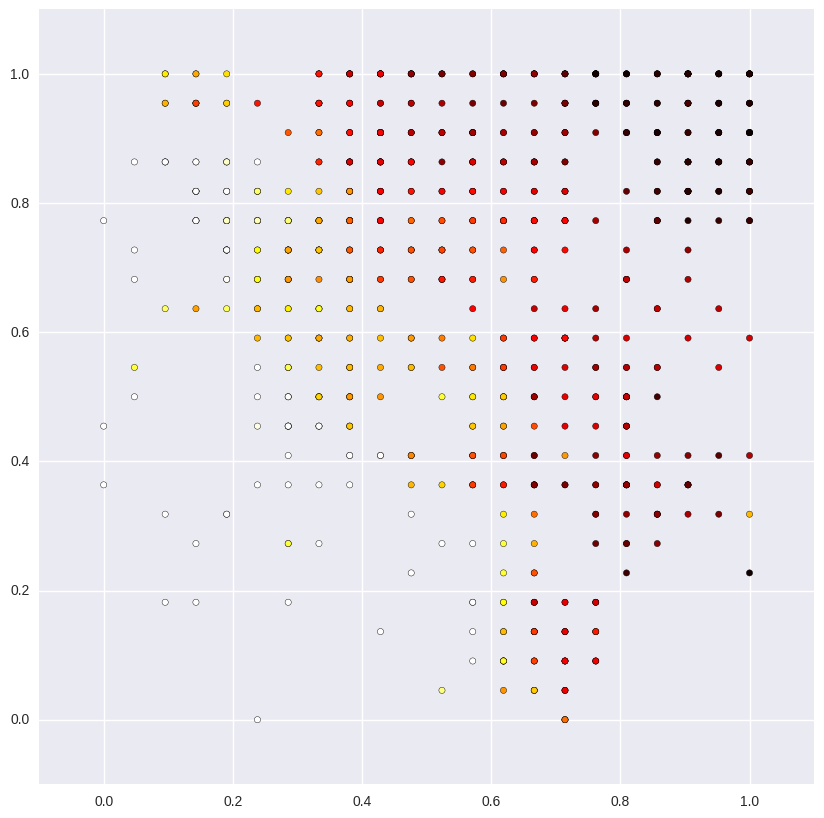

In [5]:
x_1 = (X_s[:, -1] - X_s[:, -1].min()) / (X_s[:, -1].max() - X_s[:, -1].min())
x_2 = (X_s[:, -2] - X_s[:, -2].min()) / (X_s[:, -2].max() - X_s[:, -2].min())

pl.figure(figsize=(10, 10))
pl.scatter(x_1, x_2, c=colors)
pl.xlim(-0.1, 1.1)
pl.ylim(-0.1, 1.1)
pl.show()

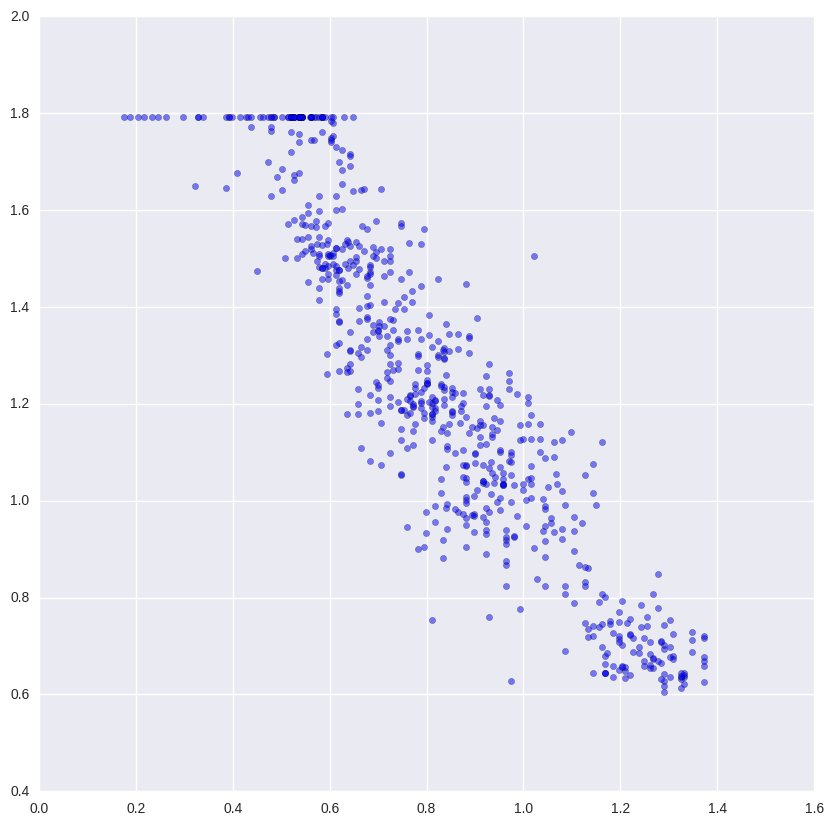

In [7]:
a = 5./np.sqrt(34)
b = 3.0/sqrt(34)

pl.figure(figsize=(10, 10))
pl.scatter(a * x_1 + b * x_2, np.log1p(Y_s), alpha=0.5)
pl.show()

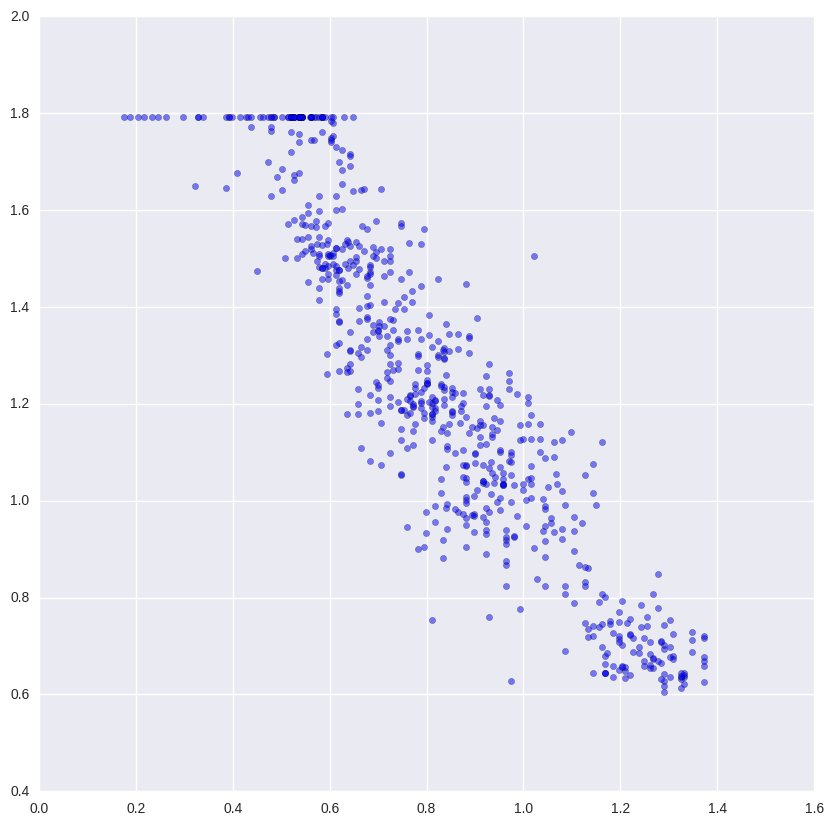

In [8]:
z = a * x_1 + b * x_2

pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)

pl.xlim(0.0, 1.6)
pl.ylim(0.4, 2.0)
pl.show()

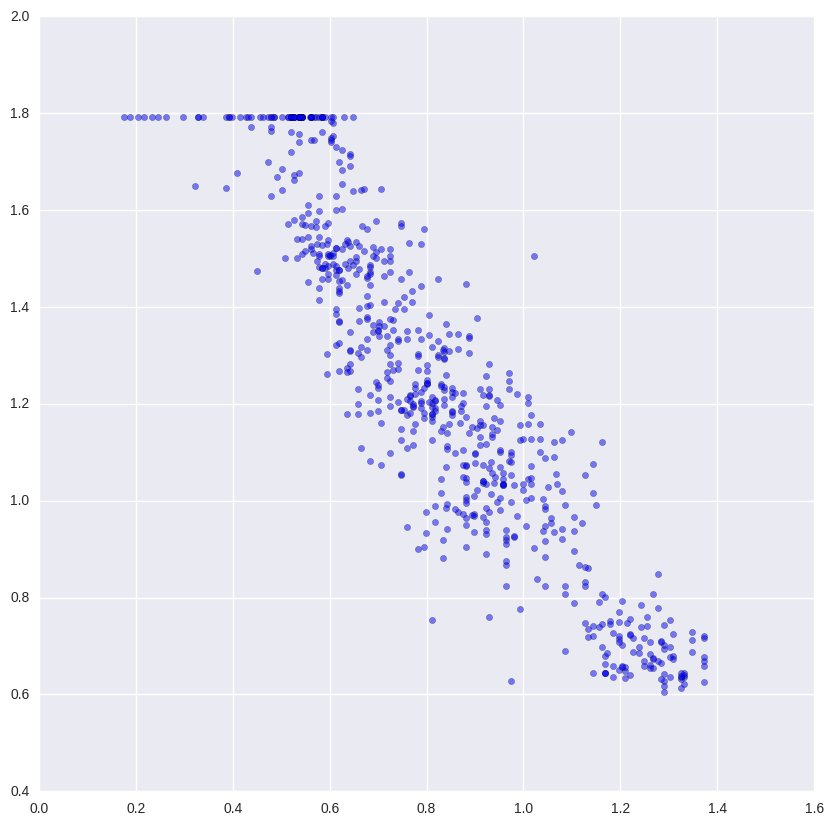

In [9]:
z = a * x_1 + b * x_2

pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)


pl.xlim(0.0, 1.6)
pl.ylim(0.4, 2.0)
pl.show()